In [1]:
!pip install tensorflow


[notice] A new release of pip available: 22.3 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install torch

  Using cached typing_extensions-4.7.1-py3-none-any.whl (33 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.13.0 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.7.1 which is incompatible.

[notice] A new release of pip available: 22.3 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [4]:
pwd

'C:\\Users\\ELCOT'

In [5]:
df = pd.read_csv(r"C:\Users\ELCOT\Downloads/Tesla.csv - Tesla.csv.csv" , parse_dates=True , index_col="Date")
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999
2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999
2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001
2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [6]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


In [7]:
print(df.shape)
df.info()

(1692, 6)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1692 entries, 2010-06-29 to 2017-03-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1692 non-null   float64
 1   High       1692 non-null   float64
 2   Low        1692 non-null   float64
 3   Close      1692 non-null   float64
 4   Volume     1692 non-null   int64  
 5   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 92.5 KB


In [ ]:
##DATA VISUALIZATION

<Axes: >

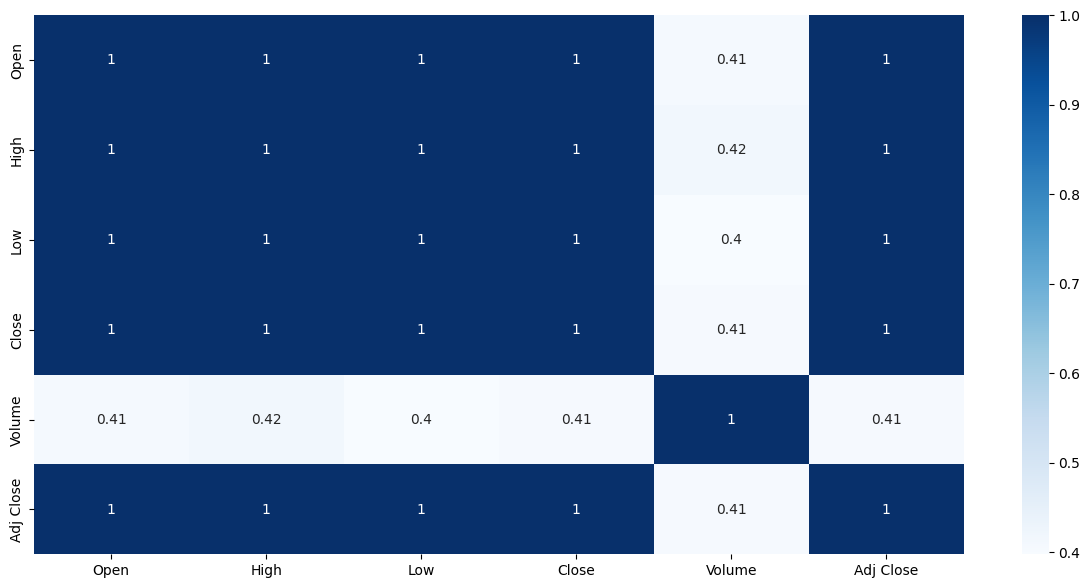

In [8]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

Text(0, 0.5, 'Close Price USD')

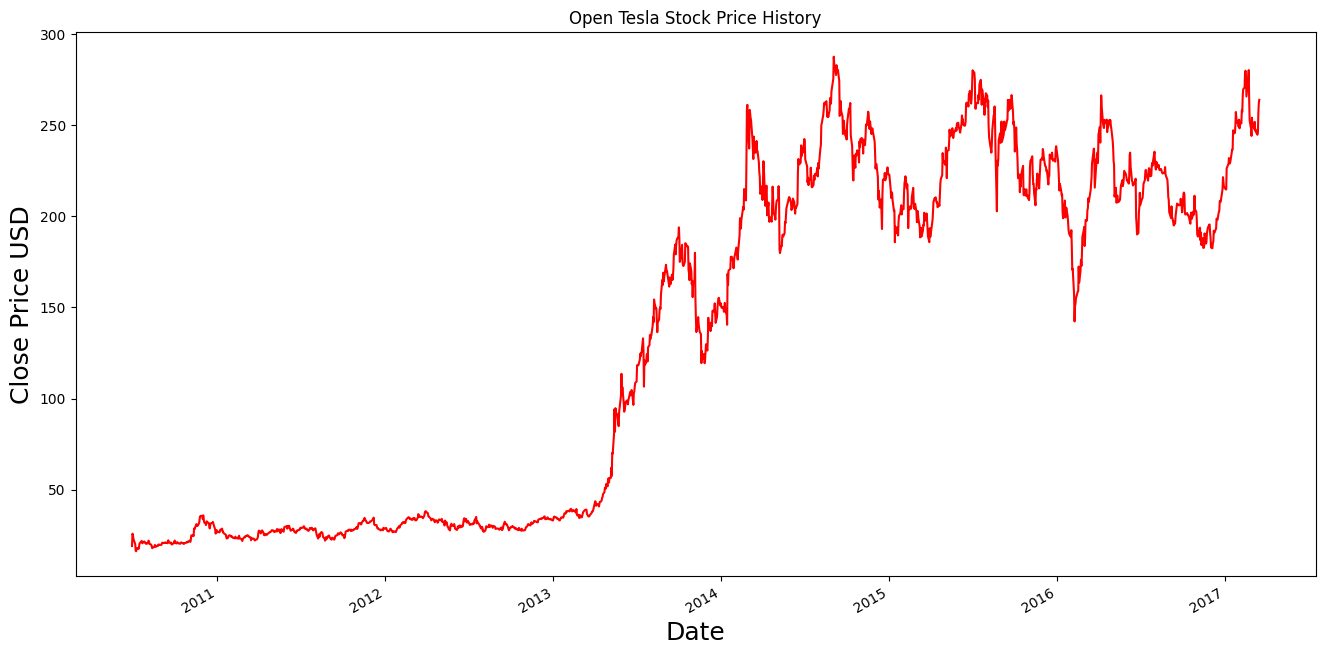

In [9]:
df["Open"].plot(figsize=(16,8) , color='red')
plt.title("Open Tesla Stock Price History")
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize = 18)

[ 16.139999  16.4       17.389999 ... 282.98999  284.01001  287.670013] This is the Sorted data of Open Share Price


Text(0, 0.5, 'Frequency')

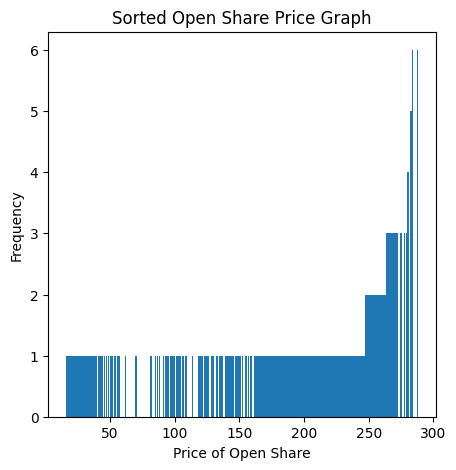

In [10]:
print(np.sort(df['Open']), "This is the Sorted data of Open Share Price")
plt.figure(figsize=(5,5))
plt.bar(list(np.sort(df['Open'].value_counts().keys())), list(np.sort(df['Open'].value_counts())))
plt.title("Sorted Open Share Price Graph")
plt.xlabel("Price of Open Share")
plt.ylabel("Frequency")

In [11]:
##DATA PREPROCESSING
df.isna().any()

Open         False
High         False
Low          False
Close        False
Volume       False
Adj Close    False
dtype: bool

In [12]:
#choosing prediction col
dataset = df["Open"]
dataset = pd.DataFrame(dataset)

data = dataset.values

data.shape

(1692, 1)

In [13]:
##NORMALISING THE DATA
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

In [14]:
##SPLITTING THE DATA

# 75% to Train , 25% to Test
train_size = int(len(data)*.75)
test_size = len(data) - train_size

print("Train Size :",train_size,"Test Size :",test_size)

train_data = scaled_data[ :train_size , 0:1 ]
test_data = scaled_data[ train_size-60: , 0:1 ]

Train Size : 1269 Test Size : 423


In [15]:
train_data.shape,test_data.shape

((1269, 1), (483, 1))

In [16]:
##CREATING TRAINING SET

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [17]:
# Convert to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)


In [18]:
# Reshaping the input
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [19]:
x_train.shape , y_train.shape

((1209, 60, 1), (1209,))

In [20]:
##BUILDING LSTM MODEL


model =Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences= False))
model.add(Dense(32))
model.add(Dense(16))
model.add(Dense(1))


model.compile(optimizer = 'adam', loss = 'mse' , metrics="mean_absolute_error")

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 42465 (165.88 KB)
Trainable params: 42465 (165.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
# Fitting the LSTM to the Training set
callbacks = [EarlyStopping(monitor='loss', patience=10 , restore_best_weights=True)]
history = model.fit(x_train, y_train, epochs = 100, batch_size = 32 , callbacks = callbacks )

Epoch 1/100
38/38 [==============================] - 23s 155ms/step - loss: 0.0256 - mean_absolute_error: 0.0963
Epoch 2/100
38/38 [==============================] - 5s 139ms/step - loss: 0.0012 - mean_absolute_error: 0.0230
Epoch 3/100
38/38 [==============================] - 5s 136ms/step - loss: 0.0011 - mean_absolute_error: 0.0206
Epoch 4/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0011 - mean_absolute_error: 0.0209
Epoch 5/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0011 - mean_absolute_error: 0.0207
Epoch 6/100
38/38 [==============================] - 4s 108ms/step - loss: 9.7656e-04 - mean_absolute_error: 0.0199
Epoch 7/100
38/38 [==============================] - 4s 104ms/step - loss: 9.1880e-04 - mean_absolute_error: 0.0190
Epoch 8/100
38/38 [==============================] - 4s 105ms/step - loss: 8.3587e-04 - mean_absolute_error: 0.0184
Epoch 9/100
38/38 [==============================] - 4s 104ms/step - loss: 7.9767e-04 - mea

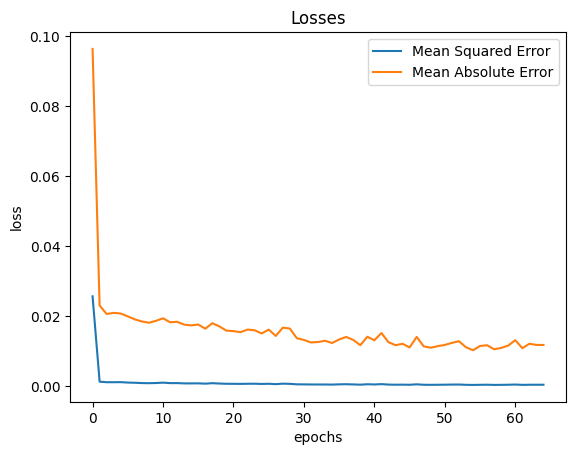

In [23]:
##VISUALIZING PERFORMANCE

plt.plot(history.history["loss"])
plt.plot(history.history["mean_absolute_error"])
plt.legend(['Mean Squared Error','Mean Absolute Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [25]:
##CREATING TEST SET

# Creating a testing set with 60 time-steps and 1 output
x_test = []
y_test = []

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [26]:
x_test.shape , y_test.shape

((423, 60, 1), (423,))

In [27]:
##PREDICTING TEST SET

#inverse y_test scaling
predictions = model.predict(x_test)

#inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape

14/14 [==============================] - 3s 59ms/step


(423, 1)

In [28]:
##ROOT MEAN SQUARE ERROR

#inverse y_test scaling
y_test = scaler.inverse_transform([y_test])

RMSE = np.sqrt(np.mean( y_test - predictions )**2).round(2)
RMSE

2.76

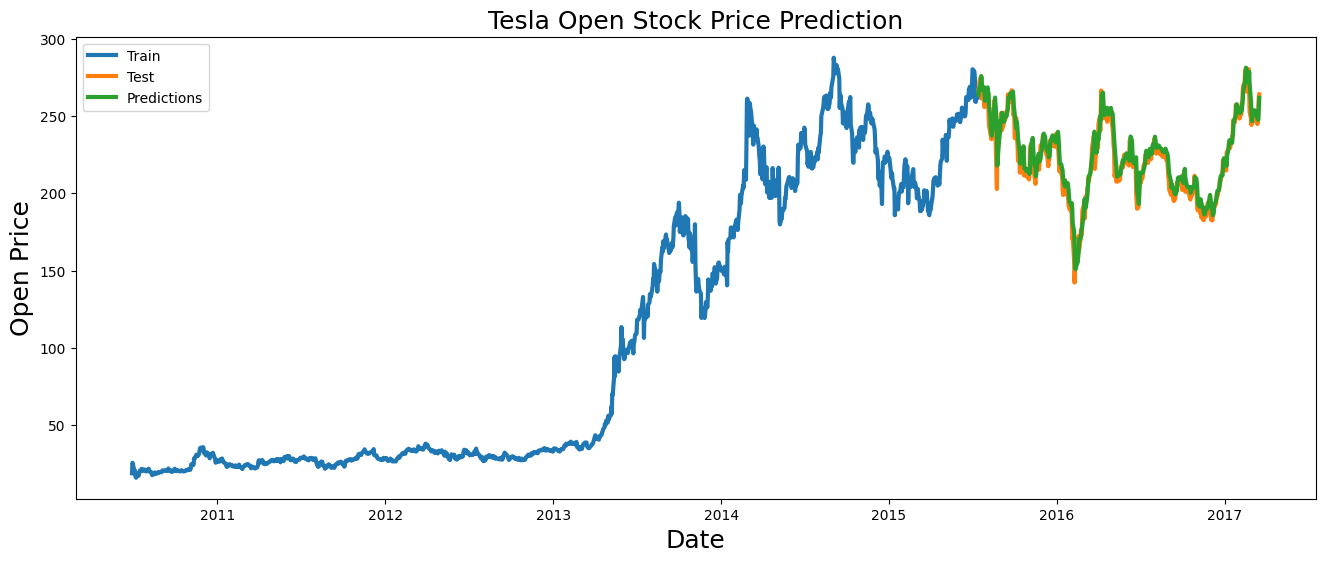

In [29]:
##VISUALIZING PREDICTION WITH THE DATA

train = dataset.iloc[:train_size , 0:1]
test = dataset.iloc[train_size: , 0:1]
test['Predictions'] = predictions

plt.figure(figsize=(16,6))
plt.title('Tesla Open Stock Price Prediction' , fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price' ,fontsize=18)
plt.plot(train['Open'],linewidth=3)
plt.plot(test['Open'],linewidth=3)
plt.plot(test["Predictions"],linewidth=3)
plt.legend(['Train','Test','Predictions'])